In [1]:
# PS: maybe build in a little pie chart or such to have a look at diagnosed, vs perceived mental health of employees vs. self-employed
# Graphics and diagrams ideas:
        # Mentalhealth different locations
        # Mental healt correlation of comp size
        # mh correlation of different jobs
        # mh correlation of openness via things liike the comfort to discuss mh, and the company showing intiative and Actual Mental health
        # Bad experiences with mental health

In [2]:
# DataFrame handling
import polars as pl
# Unicode normalization
import unicodedata
# Mathematical operations and possible handling of NULL values
import numpy as np
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Feature engineering, selection & Machine Learning
from sklearn.preprocessing import OrdinalEncoder

# Define the input CSV file and create a DataFrame
csv = 'input.csv'
df_csv = pl.read_csv(csv)

# Get the shape of dataframe
print(df_csv.shape)

(1433, 63)


In [3]:
# Get insights into Statistics. DF too large for useful information
df_csv.describe()

statistic,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?_duplicated_0,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you s

In [4]:
# First look at a couple of entries
df_csv.glimpse(max_items_per_column=10)
# Insights include: Some Categoricals are 0,1 even though it could be yes or no, some questions are for self-employed which can be dropped
# Column names are hard to work with and need to be renamed
# Lots of textual data, needs unicode normalization and natural language processing (?TF-IDF?)
# Imputation necessary for Null values

Rows: 1433
Columns: 63
$ Are you self-employed?                             <i64> 0, 0, 0, 1, 0, 0, 0, 0, 0, 1
$ How many employees does your company or organizat… <str> '26-100', '6-25', '6-25', None, '6-25', 'More than 1000', '26-100', 'More than 1000', '26-100', None
$ Is your employer primarily a tech company/organiz… <i64> 1, 1, 1, None, 0, 1, 1, 1, 0, None
$ Is your primary role within your company related … <i64> None, None, None, None, 1, None, None, None, 1, None
$ Does your employer provide mental health benefits… <str> 'Not eligible for coverage / N/A', 'No', 'No', None, 'Yes', 'Yes', "I don't know", 'Yes', "I don't know", None
$ Do you know the options for mental health care av… <str> 'N/A', 'Yes', 'N/A', None, 'Yes', 'I am not sure', 'No', 'Yes', 'No', None
$ Has your employer ever formally discussed mental … <str> 'No', 'Yes', 'No', None, 'No', 'No', 'No', 'No', 'No', None
$ Does your employer offer resources to learn more … <str> 'No', 'Yes', 'No', None, 'No', 'Yes', 'No

In [5]:
# Investigate the amount of USA workers
# 840 is 59%
# Quick win could be visualization of which countires have the most diagnosis vs the most perceived mental health issues
# More in depth could be which states have the most mental health issues
# For this although you should investigate some percentages instead of absolute values because that could be tricky
df_csv.select(pl.col("What country do you live in?") == "United States of America").filter(pl.col("What country do you live in?") == True)

What country do you live in?
bool
true
true
true
true
true
…
true
true
true


In [6]:
# Unicode normalization to prevent major difficulties with any weird strings
string_df = df_csv.select(pl.col(pl.String))

df_normalized = df_csv.with_columns(
    df_csv.select(pl.col(pl.String).map_elements(lambda x : unicodedata.normalize("NFD" , str(x)) , return_dtype=pl.String))
)

df = df_normalized.with_columns(
    df_normalized.select(pl.col(pl.String).map_elements(lambda x : unicodedata.normalize("NFC" , str(x)) , return_dtype=pl.String))
)

In [7]:
# Here we rename the columns
# Create a list of all column names to preserve the originals for later
col_names = df.columns

# Dictionary to rename columns
new_names = { "Are you self-employed?" : "self-employed_indic" ,
             "How many employees does your company or organization have?" : "comp_size" ,
             "Is your employer primarily a tech company/organization?" : "tech_comp_indic" ,
             "Is your primary role within your company related to tech/IT?" : "tech_role_indic",
             "Does your employer provide mental health benefits as part of healthcare coverage?" : "availability_of_benefits" ,
             "Do you know the options for mental health care available under your employer-provided coverage?" : "awareness_of_benefits" , 
             "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?" : "mh_discussion_indic" ,
             "Does your employer offer resources to learn more about mental health concerns and options for seeking help?" : "mh_resources_availability_indic" ,
             "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?" : "anonym_use_benefit_indic" ,
             "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:" : "sick_leave_difficulty" ,
             "Do you think that discussing a mental health disorder with your employer would have negative consequences?" : "neg_consequences_discussing_mh" ,
             "Do you think that discussing a physical health issue with your employer would have negative consequences?" : "neg_consequences_discussing_ph" ,
             "Would you feel comfortable discussing a mental health disorder with your coworkers?" : "comf_discussing_mh_with_coworker_indic" ,
             "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?" : "comf_discussing_mnh_with_supervisor_indic" ,
             "Do you feel that your employer takes mental health as seriously as physical health?" : "employer_importance_mh_vs_ph" ,
             "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?" : "known_neg_consequences_of_mh" ,
             "Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?" : "med_coverage_mh_indic" ,
             "Do you know local or online resources to seek help for a mental health disorder?" : "known_mh_sources" ,
             "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?" : "mention_mh_to_clients" ,
             "If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?" : "neg_impact_of_reveal_to_client_of_mh" ,
             "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?" : "mention_mh_to_employees" ,
             "If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?" : "neg_impact_of_reveal_to_employee_of_mh" ,
             "Do you believe your productivity is ever affected by a mental health issue?" : "productivity_effect_of_mh" ,
             "If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?" : "time_effect_of_mh" ,
             "Do you have previous employers?" : "prev_employers" ,
             "Have your previous employers provided mental health benefits?" : "availability_of_benefits_prev_employer" , 
             "Were you aware of the options for mental health care provided by your previous employers?" : "awareness_of_benefits_prev_employer" ,
             "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?" : "mh_discussion_indic_prev_employer" ,
             "Did your previous employers provide resources to learn more about mental health issues and how to seek help?" : "mh_resources_availability_indic_prev_employer" ,
             "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?" : "anonym_use_benefit_indic_prev_employer" ,
             "Do you think that discussing a mental health disorder with previous employers would have negative consequences?" : "neg_consequences_discussing_mh_prev_employer" , 
             "Do you think that discussing a physical health issue with previous employers would have negative consequences?" : "neg_consequences_discussing_ph_prev_employer" ,
             "Would you have been willing to discuss a mental health issue with your previous co-workers?" : "comf_discussing_mh_with_coworker_prev_employer" ,
             "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?" : "comf_discussing_mnh_with_supervisor_prev_employer" ,
             "Did you feel that your previous employers took mental health as seriously as physical health?" : "employer_importance_mh_vs_ph_prev_employer" ,
             "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?" : "known_neg_consequences_of_mh_prev_employer" ,
             "Would you be willing to bring up a physical health issue with a potential employer in an interview?" : "willing_discuss_ph_in_hiring_interview" ,
             "Why or why not?" : "why_why_not_1" ,
             "Would you bring up a mental health issue with a potential employer in an interview?" : "willing_discuss_mh_in_hiring_interview" ,
             "Why or why not?2" : "why_why_not_2" ,
             "Do you feel that being identified as a person with a mental health issue would hurt your career?" : "percevied_neg_impact_carreer_of_mh" ,
             "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?" : "perceived_neg_impact_coworker_opiniton_of_mh" ,
             "How willing would you be to share with friends and family that you have a mental illness?" : "willingness_to_share_with_friend_family" ,
             "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?" : "neg_response_to_mh" ,
             "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?" : "willingness_to_share_mh_after_observation" ,
             "Do you have a family history of mental illness?" : "mh_family_hist" ,
             "Have you had a mental health disorder in the past?" : "previous_mh" ,
             "Do you currently have a mental health disorder?" : "current_mh" ,
             "If yes, what condition(s) have you been diagnosed with?" :  "diagnosis_name_condition" ,
             "If maybe, what condition(s) do you believe you have?" : "believed_name_condiiton" ,
             "Have you been diagnosed with a mental health condition by a medical professional?" : "diagnosis_professional" ,
             "If so, what condition(s) were you diagnosed with?" : "diagnosis_name_professional_condition" ,
             "Have you ever sought treatment for a mental health issue from a mental health professional?" : "used_therapy" ,
             "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?" : "interference_mh_treated_with_work" ,
             "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?" : "interference_mh_untreated_with_work" ,
             "What is your age?" : "age" ,
             "What is your gender?" : "gender" ,
             "What country do you live in?" : "country_residency" ,
             "What US state or territory do you live in?" : "usa_state_residency" ,
             "What country do you work in?" : "country_work" ,
             "What US state or territory do you work in?" : "usa_state_work" ,
             "Which of the following best describes your work position?" : "job_title" ,
             "Do you work remotely?" : "remote" ,
            }

# Rename the keys in the dictionary with the names of the original DataFrame. This has to be done because I copied the titles from excel which was stupid and I made a mistake
new_names = dict((col_names[list(new_names.keys()).index(key)], value) for key, value in new_names.items())
df = df.rename(new_names).with_row_index("index")

In [8]:
# Second look at a couple of entries
df.glimpse(max_items_per_column=10)

Rows: 1433
Columns: 64
$ index                                             <u32> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
$ self-employed_indic                               <i64> 0, 0, 0, 1, 0, 0, 0, 0, 0, 1
$ comp_size                                         <str> '26-100', '6-25', '6-25', None, '6-25', 'More than 1000', '26-100', 'More than 1000', '26-100', None
$ tech_comp_indic                                   <i64> 1, 1, 1, None, 0, 1, 1, 1, 0, None
$ tech_role_indic                                   <i64> None, None, None, None, 1, None, None, None, 1, None
$ availability_of_benefits                          <str> 'Not eligible for coverage / N/A', 'No', 'No', None, 'Yes', 'Yes', "I don't know", 'Yes', "I don't know", None
$ awareness_of_benefits                             <str> 'N/A', 'Yes', 'N/A', None, 'Yes', 'I am not sure', 'No', 'Yes', 'No', None
$ mh_discussion_indic                               <str> 'No', 'Yes', 'No', None, 'No', 'No', 'No', 'No', 'No', None
$ mh_resources_avail

[Text(0, 0, '43'), Text(0, 0, '21'), Text(0, 0, '12')]

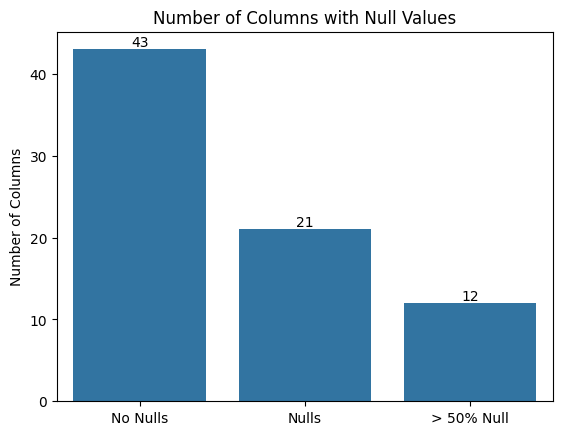

In [9]:
# Count columns with null values and those without
null_counts = df.null_count()

# Transpose the dataframe to write the amount of null values entriewise
null_counts_trans = null_counts.transpose(include_header= True)
# Get the number of columns with null values and without
true_null_counts = null_counts_trans.filter(pl.col("column_0") == 0).shape[0]
non_null_counts = null_counts_trans.filter(pl.col("column_0") != 0).shape[0]

# Calculate the percentage of NULL values per column and get the number
null_counts_perc = null_counts_trans.with_columns((pl.col("column_0") / df.shape[0] * 100).cast(pl.Int32).alias("null_perc") )
num_null_counts_exc_50_perc = null_counts_perc.filter(pl.col("null_perc") >= 50).shape[0]

# Create a dictionary with the relevant information
nulls_dict = {"No Nulls" : non_null_counts , "Nulls" : true_null_counts ,  "> 50% Null" : num_null_counts_exc_50_perc}
# Plot the amount of columns with null values
ax = sns.barplot(data=nulls_dict)
ax.set(xlabel='' , ylabel='Number of Columns')
ax.set_title("Number of Columns with Null Values")
ax.bar_label(ax.containers[0], fontsize=10)

In [10]:
df.head()

index,self-employed_indic,comp_size,tech_comp_indic,tech_role_indic,availability_of_benefits,awareness_of_benefits,mh_discussion_indic,mh_resources_availability_indic,anonym_use_benefit_indic,sick_leave_difficulty,neg_consequences_discussing_mh,neg_consequences_discussing_ph,comf_discussing_mh_with_coworker_indic,comf_discussing_mnh_with_supervisor_indic,employer_importance_mh_vs_ph,known_neg_consequences_of_mh,med_coverage_mh_indic,known_mh_sources,mention_mh_to_clients,neg_impact_of_reveal_to_client_of_mh,mention_mh_to_employees,neg_impact_of_reveal_to_employee_of_mh,productivity_effect_of_mh,time_effect_of_mh,prev_employers,availability_of_benefits_prev_employer,awareness_of_benefits_prev_employer,mh_discussion_indic_prev_employer,mh_resources_availability_indic_prev_employer,anonym_use_benefit_indic_prev_employer,neg_consequences_discussing_mh_prev_employer,neg_consequences_discussing_ph_prev_employer,comf_discussing_mh_with_coworker_prev_employer,comf_discussing_mnh_with_supervisor_prev_employer,employer_importance_mh_vs_ph_prev_employer,known_neg_consequences_of_mh_prev_employer,willing_discuss_ph_in_hiring_interview,why_why_not_1,willing_discuss_mh_in_hiring_interview,why_why_not_2,percevied_neg_impact_carreer_of_mh,perceived_neg_impact_coworker_opiniton_of_mh,willingness_to_share_with_friend_family,neg_response_to_mh,willingness_to_share_mh_after_observation,mh_family_hist,previous_mh,current_mh,diagnosis_name_condition,believed_name_condiiton,diagnosis_professional,diagnosis_name_professional_condition,used_therapy,interference_mh_treated_with_work,interference_mh_untreated_with_work,age,gender,country_residency,usa_state_residency,country_work,usa_state_work,job_title,remote
u32,i64,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,i64,str,str,str,str,str,str,str
0,0,"""26-100""",1,null,"""Not eligible for coverage / N/…","""N/A""","""No""","""No""","""I don't know""","""Very easy""","""No""","""No""","""Maybe""","""Yes""","""I don't know""","""No""",null,null,null,null,null,null,null,null,1,"""No, none did""","""N/A (not currently aware)""","""I don't know""","""None did""","""I don't know""","""Some of them""","""None of them""","""Some of my previous employers""","""Some of my previous employers""","""I don't know""","""None of them""","""Maybe""",null,"""Maybe""",null,"""Maybe""","""No, I don't think they would""","""Somewhat open""","""No""",null,"""No""","""Yes""","""No""",null,null,"""Yes""","""Anxiety Disorder (Generalized,…",0,"""Not applicable to me""","""Not applicable to me""",39,"""Male""","""United Kingdom""",null,"""United Kingdom""",null,"""Back-end Developer""","""Sometimes"""
1,0,"""6-25""",1,null,"""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Somewhat easy""","""No""","""No""","""Maybe""","""Yes""","""Yes""","""No""",null,null,null,null,null,null,null,null,1,"""Yes, they all did""","""I was aware of some""","""None did""","""Some did""","""Yes, always""","""None of them""","""None of them""","""No, at none of my previous emp…","""Some of my previous employers""","""Some did""","""None of them""","""Maybe""","""It would depend on the health …","""No""","""While mental health has become…","""No, I don't think it would""","""No, I don't think they would""","""Somewhat open""","""No""",null,"""Yes""","""Yes""","""Yes""","""Anxiety Disorder (Generalized,…",null,"""Yes""","""Anxiety Disorder (Generalized,…",1,"""Rarely""","""Sometimes""",29,"""male""","""United States of America""","""Illinois""","""United States of America""","""Illinois""","""Back-end Developer|Front-end D…","""Never"""
2,0,"""6-25""",1,null,"""No""","""N/A""","""No""","""No""","""I don't know""","""Neither easy nor difficult""","""Maybe""","""No""","""Maybe""","""Maybe""","""I don't know""","""No""",null,null,null,null,null,null,null,null,1,"""No, none did""","""N/A 

In [11]:
# Drop all columns that are meant for self-employed and have more than 50% Null values
df = df.filter(pl.col("self-employed_indic") != 1)
df = df.drop("self-employed_indic")

# Drop all columns with more than 50% Null values
# First look at the columns with more than 50% Null Values
drop_col_list = pl.Series(null_counts_perc.filter(pl.col("null_perc")>50).select(pl.col("column"))).to_list()
print(drop_col_list)

# tech_role_indic can perhaps be imputed via the job title

['tech_role_indic', 'med_coverage_mh_indic', 'known_mh_sources', 'mention_mh_to_clients', 'neg_impact_of_reveal_to_client_of_mh', 'mention_mh_to_employees', 'neg_impact_of_reveal_to_employee_of_mh', 'productivity_effect_of_mh', 'time_effect_of_mh', 'diagnosis_name_condition', 'believed_name_condiiton']


In [12]:
# Convert all strings lower case
df = df.with_columns(pl.col(pl.String).str.to_lowercase())

In [13]:
# Now lets find the list of tech jobs
tech_jobs_list =  df.filter(pl.col("tech_role_indic") == 1).select("job_title").rows()

# Job list is currently a list nested of tuples
# Define function to flatten nested list
def flatten_list(list_input):
    job_list = []
    for x in list_input:
        job_list.extend(x)
    return job_list

# Clear job_list of any nested tuples and splitters
job_list = flatten_list(tech_jobs_list)
job_list = [x.split('|') for x in job_list]
job_list = flatten_list(job_list)
job_list = [x.split('/') for x in job_list]
job_list = flatten_list(job_list)

# Clear job titles of non-tech jobs
excluded_jobs = ['other' , 'designer' , 'support' , 'team lead' , 'sales' , 'supervisor' , 'advocate' , 'one-person shop' , 'executive leadership', 'hr']
job_list = [x for x in job_list if x not in excluded_jobs]

job_list = np.unique(job_list)

# Now that we have a cleaned list of tech jobs we need to impute out polars DataFrame
# First we construct a regex pattern to catch all possible values

job_pattern = '|'.join(job_list)

df = df.with_columns(
    pl.when(
        (pl.col('job_title').str.contains(job_pattern)) & (pl.col('tech_role_indic').is_null())
    ).then(1).otherwise(0).alias('tech_role_indic')
)

In [14]:
df.glimpse(max_items_per_column=10)

Rows: 1146
Columns: 63
$ index                                             <u32> 0, 1, 2, 4, 5, 6, 7, 8, 10, 11
$ comp_size                                         <str> '26-100', '6-25', '6-25', '6-25', 'more than 1000', '26-100', 'more than 1000', '26-100', '26-100', '100-500'
$ tech_comp_indic                                   <i64> 1, 1, 1, 0, 1, 1, 1, 0, 1, 0
$ tech_role_indic                                   <i32> 1, 1, 1, 0, 1, 1, 1, 0, 1, 0
$ availability_of_benefits                          <str> 'not eligible for coverage / n/a', 'no', 'no', 'yes', 'yes', "i don't know", 'yes', "i don't know", 'yes', 'yes'
$ awareness_of_benefits                             <str> 'n/a', 'yes', 'n/a', 'yes', 'i am not sure', 'no', 'yes', 'no', 'i am not sure', 'yes'
$ mh_discussion_indic                               <str> 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no'
$ mh_resources_availability_indic                   <str> 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'y

In [15]:
print(df.shape)

(1146, 63)


In [16]:
# Reconstruct the columns with too many null values
null_counts = df.null_count().transpose(include_header= True)
null_counts_perc = null_counts.with_columns((pl.col("column_0") / df.shape[0] * 100).cast(pl.Int32).alias("null_perc") )
drop_col_list = pl.Series(null_counts_perc.filter(pl.col("null_perc")>50).select(pl.col("column"))).to_list()

# Now drop the columns with more than 50% null values
df = df.drop(drop_col_list)

In [17]:
print(df.shape)

(1146, 53)


In [18]:
df.glimpse(max_items_per_column=10)

Rows: 1146
Columns: 53
$ index                                             <u32> 0, 1, 2, 4, 5, 6, 7, 8, 10, 11
$ comp_size                                         <str> '26-100', '6-25', '6-25', '6-25', 'more than 1000', '26-100', 'more than 1000', '26-100', '26-100', '100-500'
$ tech_comp_indic                                   <i64> 1, 1, 1, 0, 1, 1, 1, 0, 1, 0
$ tech_role_indic                                   <i32> 1, 1, 1, 0, 1, 1, 1, 0, 1, 0
$ availability_of_benefits                          <str> 'not eligible for coverage / n/a', 'no', 'no', 'yes', 'yes', "i don't know", 'yes', "i don't know", 'yes', 'yes'
$ awareness_of_benefits                             <str> 'n/a', 'yes', 'n/a', 'yes', 'i am not sure', 'no', 'yes', 'no', 'i am not sure', 'yes'
$ mh_discussion_indic                               <str> 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no'
$ mh_resources_availability_indic                   <str> 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'y

In [19]:
# Standardize all categorical columsn that are currently answered with 0/1 instead of yes/no
df = df.with_columns(
    pl.when(pl.col('tech_comp_indic') == 1).then(pl.lit('yes')).when(pl.col('tech_comp_indic') == 0).then(pl.lit('no')).alias('tech_comp_indic') ,
    pl.when(pl.col('tech_role_indic') == 1).then(pl.lit('yes')).when(pl.col('tech_role_indic') == 0).then(pl.lit('no')).alias('tech_role_indic') ,
    pl.when(pl.col('used_therapy') == 1).then(pl.lit('yes')).when(pl.col('used_therapy') == 0).then(pl.lit('no')).alias('used_therapy')          ,                          
    pl.when(pl.col('prev_employers') == 1).then(pl.lit('yes')).when(pl.col('prev_employers') == 0).then(pl.lit('no')).alias('prev_employers')
)

In [20]:
df.null_count()

index,comp_size,tech_comp_indic,tech_role_indic,availability_of_benefits,awareness_of_benefits,mh_discussion_indic,mh_resources_availability_indic,anonym_use_benefit_indic,sick_leave_difficulty,neg_consequences_discussing_mh,neg_consequences_discussing_ph,comf_discussing_mh_with_coworker_indic,comf_discussing_mnh_with_supervisor_indic,employer_importance_mh_vs_ph,known_neg_consequences_of_mh,prev_employers,availability_of_benefits_prev_employer,awareness_of_benefits_prev_employer,mh_discussion_indic_prev_employer,mh_resources_availability_indic_prev_employer,anonym_use_benefit_indic_prev_employer,neg_consequences_discussing_mh_prev_employer,neg_consequences_discussing_ph_prev_employer,comf_discussing_mh_with_coworker_prev_employer,comf_discussing_mnh_with_supervisor_prev_employer,employer_importance_mh_vs_ph_prev_employer,known_neg_consequences_of_mh_prev_employer,willing_discuss_ph_in_hiring_interview,why_why_not_1,willing_discuss_mh_in_hiring_interview,why_why_not_2,percevied_neg_impact_carreer_of_mh,perceived_neg_impact_coworker_opiniton_of_mh,willingness_to_share_with_friend_family,neg_response_to_mh,willingness_to_share_mh_after_observation,mh_family_hist,previous_mh,current_mh,diagnosis_professional,diagnosis_name_professional_condition,used_therapy,interference_mh_treated_with_work,interference_mh_untreated_with_work,age,gender,country_residency,usa_state_residency,country_work,usa_state_work,job_title,remote
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,131,131,131,131,131,131,131,131,131,131,0,274,0,249,0,0,0,0,546,0,0,0,0,583,0,0,0,0,1,0,437,0,430,0,0


It is evident that country_residency, usa_state_residency , country_work , usa_state_work can be imputed somehow  
Instead of NULL we can come up with a string that says 'international' or 'not applicable'

In [21]:
df = df.with_columns(
    pl.when(pl.col('country_residency') != 'united states of america').then(pl.lit('international')).otherwise('usa_state_residency').alias('usa_state_residency'),
    pl.when(pl.col('country_work') != 'united states of america').then(pl.lit('international')).otherwise('usa_state_work').alias('usa_state_work')
)

### Investigate Null Values

In [22]:
df.null_count()

index,comp_size,tech_comp_indic,tech_role_indic,availability_of_benefits,awareness_of_benefits,mh_discussion_indic,mh_resources_availability_indic,anonym_use_benefit_indic,sick_leave_difficulty,neg_consequences_discussing_mh,neg_consequences_discussing_ph,comf_discussing_mh_with_coworker_indic,comf_discussing_mnh_with_supervisor_indic,employer_importance_mh_vs_ph,known_neg_consequences_of_mh,prev_employers,availability_of_benefits_prev_employer,awareness_of_benefits_prev_employer,mh_discussion_indic_prev_employer,mh_resources_availability_indic_prev_employer,anonym_use_benefit_indic_prev_employer,neg_consequences_discussing_mh_prev_employer,neg_consequences_discussing_ph_prev_employer,comf_discussing_mh_with_coworker_prev_employer,comf_discussing_mnh_with_supervisor_prev_employer,employer_importance_mh_vs_ph_prev_employer,known_neg_consequences_of_mh_prev_employer,willing_discuss_ph_in_hiring_interview,why_why_not_1,willing_discuss_mh_in_hiring_interview,why_why_not_2,percevied_neg_impact_carreer_of_mh,perceived_neg_impact_coworker_opiniton_of_mh,willingness_to_share_with_friend_family,neg_response_to_mh,willingness_to_share_mh_after_observation,mh_family_hist,previous_mh,current_mh,diagnosis_professional,diagnosis_name_professional_condition,used_therapy,interference_mh_treated_with_work,interference_mh_untreated_with_work,age,gender,country_residency,usa_state_residency,country_work,usa_state_work,job_title,remote
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,131,131,131,131,131,131,131,131,131,131,0,274,0,249,0,0,0,0,546,0,0,0,0,583,0,0,0,0,1,0,0,0,0,0,0


### Investigate if there are unusual amounts of unique values in a column and investigate

In [23]:
df.select(pl.all().n_unique())

index,comp_size,tech_comp_indic,tech_role_indic,availability_of_benefits,awareness_of_benefits,mh_discussion_indic,mh_resources_availability_indic,anonym_use_benefit_indic,sick_leave_difficulty,neg_consequences_discussing_mh,neg_consequences_discussing_ph,comf_discussing_mh_with_coworker_indic,comf_discussing_mnh_with_supervisor_indic,employer_importance_mh_vs_ph,known_neg_consequences_of_mh,prev_employers,availability_of_benefits_prev_employer,awareness_of_benefits_prev_employer,mh_discussion_indic_prev_employer,mh_resources_availability_indic_prev_employer,anonym_use_benefit_indic_prev_employer,neg_consequences_discussing_mh_prev_employer,neg_consequences_discussing_ph_prev_employer,comf_discussing_mh_with_coworker_prev_employer,comf_discussing_mnh_with_supervisor_prev_employer,employer_importance_mh_vs_ph_prev_employer,known_neg_consequences_of_mh_prev_employer,willing_discuss_ph_in_hiring_interview,why_why_not_1,willing_discuss_mh_in_hiring_interview,why_why_not_2,percevied_neg_impact_carreer_of_mh,perceived_neg_impact_coworker_opiniton_of_mh,willingness_to_share_with_friend_family,neg_response_to_mh,willingness_to_share_mh_after_observation,mh_family_hist,previous_mh,current_mh,diagnosis_professional,diagnosis_name_professional_condition,used_therapy,interference_mh_treated_with_work,interference_mh_untreated_with_work,age,gender,country_residency,usa_state_residency,country_work,usa_state_work,job_title,remote
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
1146,6,2,2,4,4,3,3,3,6,3,3,3,3,3,2,2,5,5,5,4,5,5,4,4,5,5,4,3,863,3,854,5,5,6,5,5,3,3,3,2,90,2,5,5,51,52,43,48,44,49,180,3


### Investigate the Null values of the questions (1) if subject had previous employers & (2) if those previous employers provided MH health insurance benefits

In [24]:
print(df.to_series(16).value_counts())
with pl.Config(tbl_rows=10):
    print(df.to_series(31).value_counts())

shape: (2, 2)
┌────────────────┬───────┐
│ prev_employers ┆ count │
│ ---            ┆ ---   │
│ str            ┆ u32   │
╞════════════════╪═══════╡
│ yes            ┆ 1015  │
│ no             ┆ 131   │
└────────────────┴───────┘
shape: (854, 2)
┌─────────────────────────────────┬───────┐
│ why_why_not_2                   ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ if a prospective employer is u… ┆ 1     │
│ i'd be worried it would bias t… ┆ 1     │
│ same                            ┆ 1     │
│ same reason. could cause troub… ┆ 1     │
│ not the topic of discussion un… ┆ 1     │
│ …                               ┆ …     │
│ i don't trust my employer with… ┆ 1     │
│ i feel like bringing up a ment… ┆ 1     │
│ i don't know how a potential e… ┆ 1     │
│ cos i would really want the jo… ┆ 1     │
│ might reduce my chances of get… ┆ 1     │
└─────────────────────────────────┴───────┘


### It can be seen that the NULL values are those that do not have previous employers (Same logi applies to columns index 16 to 27)
### Impute with "not applicable"
##### NOTE!! This is also a good project for visualization to see the causality

In [25]:
df = df.with_columns(	
    pl.when(pl.col('prev_employers') == 'no').then(pl.lit('not applicable')).otherwise(pl.col('availability_of_benefits_prev_employer')).alias('availability_of_benefits_prev_employer') 
    , pl.when(pl.col('prev_employers') == 'no').then(pl.lit('not applicable')).otherwise(pl.col('awareness_of_benefits_prev_employer')).alias('awareness_of_benefits_prev_employer')
    , pl.when(pl.col('prev_employers') == 'no').then(pl.lit('not applicable')).otherwise(pl.col('mh_discussion_indic_prev_employer')).alias('mh_discussion_indic_prev_employer')
    , pl.when(pl.col('prev_employers') == 'no').then(pl.lit('not applicable')).otherwise(pl.col('mh_resources_availability_indic_prev_employer')).alias('mh_resources_availability_indic_prev_employer')
    , pl.when(pl.col('prev_employers') == 'no').then(pl.lit('not applicable')).otherwise(pl.col('anonym_use_benefit_indic_prev_employer')).alias('anonym_use_benefit_indic_prev_employer')
    , pl.when(pl.col('prev_employers') == 'no').then(pl.lit('not applicable')).otherwise(pl.col('neg_consequences_discussing_mh_prev_employer')).alias('neg_consequences_discussing_mh_prev_employer')
    , pl.when(pl.col('prev_employers') == 'no').then(pl.lit('not applicable')).otherwise(pl.col('neg_consequences_discussing_ph_prev_employer')).alias('neg_consequences_discussing_ph_prev_employer')
    , pl.when(pl.col('prev_employers') == 'no').then(pl.lit('not applicable')).otherwise(pl.col('comf_discussing_mh_with_coworker_prev_employer')).alias('comf_discussing_mh_with_coworker_prev_employer')
    , pl.when(pl.col('prev_employers') == 'no').then(pl.lit('not applicable')).otherwise(pl.col('comf_discussing_mnh_with_supervisor_prev_employer')).alias('comf_discussing_mnh_with_supervisor_prev_employer')
    , pl.when(pl.col('prev_employers') == 'no').then(pl.lit('not applicable')).otherwise(pl.col('employer_importance_mh_vs_ph_prev_employer')).alias('employer_importance_mh_vs_ph_prev_employer')                    
    , pl.when(pl.col('prev_employers') == 'no').then(pl.lit('not applicable')).otherwise(pl.col('known_neg_consequences_of_mh_prev_employer')).alias('known_neg_consequences_of_mh_prev_employer')                                                        
)

In [26]:
### Investigate the remainin NULL value columns
### These are ok and can be imputed with the mean,mode or other techniques
### To make a decision discuss with DS if impuitation before TF-IDF or after makes more sense

In [27]:
print(df.select(pl.col('employer_importance_mh_vs_ph_prev_employer')))

shape: (1_146, 1)
┌─────────────────────────────────┐
│ employer_importance_mh_vs_ph_p… │
│ ---                             │
│ str                             │
╞═════════════════════════════════╡
│ i don't know                    │
│ some did                        │
│ i don't know                    │
│ some did                        │
│ none did                        │
│ …                               │
│ some did                        │
│ none did                        │
│ none did                        │
│ none did                        │
│ not applicable                  │
└─────────────────────────────────┘


In [28]:
df.null_count().transpose(include_header= True).filter(pl.col('column_0') > 0)

column,column_0
str,u32
"""why_why_not_1""",274
"""why_why_not_2""",249
"""willingness_to_share_mh_after_…",546
"""diagnosis_name_professional_co…",583
"""gender""",1


In [29]:
# Need to make a decision what to do with numbers like the comp_size
    # Just treat it as a categorical value
# Need to make a decision what to do with the textual data (TF-IDF)
# Split the Features between textual, ordinal and nominal
    # Then encode the categorical features with one technique
    # NO, instead use one-hot encoder for nominal and ordinalencoder for ordinal features
    # Then encode the textual data with another technique
# Scale everything done
# Apply Feature selection
# Apply dimensionality reduction(?) IS this really necessary at this point? What about principal component analysis as feature selection techinque
# Apply K-MEans clustering
    # First Choose K via some methods like elbow or some other shit
# Evaluate with Matrix and evaluation dataset that I have
    # For evaluation take the medical professional diagnosis

In [30]:
df.head()

index,comp_size,tech_comp_indic,tech_role_indic,availability_of_benefits,awareness_of_benefits,mh_discussion_indic,mh_resources_availability_indic,anonym_use_benefit_indic,sick_leave_difficulty,neg_consequences_discussing_mh,neg_consequences_discussing_ph,comf_discussing_mh_with_coworker_indic,comf_discussing_mnh_with_supervisor_indic,employer_importance_mh_vs_ph,known_neg_consequences_of_mh,prev_employers,availability_of_benefits_prev_employer,awareness_of_benefits_prev_employer,mh_discussion_indic_prev_employer,mh_resources_availability_indic_prev_employer,anonym_use_benefit_indic_prev_employer,neg_consequences_discussing_mh_prev_employer,neg_consequences_discussing_ph_prev_employer,comf_discussing_mh_with_coworker_prev_employer,comf_discussing_mnh_with_supervisor_prev_employer,employer_importance_mh_vs_ph_prev_employer,known_neg_consequences_of_mh_prev_employer,willing_discuss_ph_in_hiring_interview,why_why_not_1,willing_discuss_mh_in_hiring_interview,why_why_not_2,percevied_neg_impact_carreer_of_mh,perceived_neg_impact_coworker_opiniton_of_mh,willingness_to_share_with_friend_family,neg_response_to_mh,willingness_to_share_mh_after_observation,mh_family_hist,previous_mh,current_mh,diagnosis_professional,diagnosis_name_professional_condition,used_therapy,interference_mh_treated_with_work,interference_mh_untreated_with_work,age,gender,country_residency,usa_state_residency,country_work,usa_state_work,job_title,remote
u32,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str
0,"""26-100""","""yes""","""yes""","""not eligible for coverage / n/…","""n/a""","""no""","""no""","""i don't know""","""very easy""","""no""","""no""","""maybe""","""yes""","""i don't know""","""no""","""yes""","""no, none did""","""n/a (not currently aware)""","""i don't know""","""none did""","""i don't know""","""some of them""","""none of them""","""some of my previous employers""","""some of my previous employers""","""i don't know""","""none of them""","""maybe""",null,"""maybe""",null,"""maybe""","""no, i don't think they would""","""somewhat open""","""no""",null,"""no""","""yes""","""no""","""yes""","""anxiety disorder (generalized,…","""no""","""not applicable to me""","""not applicable to me""",39,"""male""","""united kingdom""","""international""","""united kingdom""","""international""","""back-end developer""","""sometimes"""
1,"""6-25""","""yes""","""yes""","""no""","""yes""","""yes""","""yes""","""yes""","""somewhat easy""","""no""","""no""","""maybe""","""yes""","""yes""","""no""","""yes""","""yes, they all did""","""i was aware of some""","""none did""","""some did""","""yes, always""","""none of them""","""none of them""","""no, at none of my previous emp…","""some of my previous employers""","""some did""","""none of them""","""maybe""","""it would depend on the health …","""no""","""while mental health has become…","""no, i don't think it would""","""no, i don't think they would""","""somewhat open""","""no""",null,"""yes""","""yes""","""yes""","""yes""","""anxiety disorder (generalized,…","""yes""","""rarely""","""sometimes""",29,"""male""","""united states of america""","""illinois""","""united states of america""","""illinois""","""back-end developer|front-end d…","""never"""
2,"""6-25""","""yes""","""yes""","""no""","""n/a""","""no""","""no""","""i don't know""","""neither easy nor difficult""","""maybe""","""no""","""maybe""","""maybe""","""i don't know""","""no""","""yes""","""no, none did""","""n/a (not currently aware)""","""none did""","""some did""","""i don't know""","""i don't know""","""some of them""","""some of my previous employers""","""i don't know""","""i don't know""","""some of them""","""yes""","""they would provable need to kn…","""yes""","""stigma, mainly. ""","""maybe""","""maybe""","""somewhat open""","""maybe/not sure""","""yes""","""no""","""maybe""","""no""

In [31]:
print(df.to_series(46).value_counts())
#with pl.Config(tbl_rows=10):
#    print(df.to_series(31).value_counts())

shape: (52, 2)
┌─────────────────────────────────┬───────┐
│ gender                          ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ cis man                         ┆ 1     │
│ male                            ┆ 7     │
│ other                           ┆ 1     │
│ male/genderqueer                ┆ 1     │
│ male                            ┆ 700   │
│ …                               ┆ …     │
│ queer                           ┆ 1     │
│ genderflux demi-girl            ┆ 1     │
│ male (trans, ftm)               ┆ 1     │
│ cis female                      ┆ 1     │
│ female-bodied; no feelings abo… ┆ 1     │
└─────────────────────────────────┴───────┘


In [32]:
# Manually categorize ordinal and nominal features
feat_cat_ordinal = ['comp_size' , 'sick_leave_difficulty' , 'availability_of_benefits' , 'availability_of_benefits_prev_employer' , 'mh_discussion_indic_prev_employer' 
                    , 'mh_resources_availability_indic_prev_employer' , 'anonym_use_benefit_indic_prev_employer' , 'neg_consequences_discussing_mh_prev_employer'
                    , 'neg_consequences_discussing_ph_prev_employer' , 'comf_discussing_mh_with_coworker_prev_employer' , 'comf_discussing_mnh_with_supervisor_prev_employer'
                    , 'employer_importance_mh_vs_ph_prev_employer' , 'known_neg_consequences_of_mh_prev_employer' , 'willingness_to_share_with_friend_family' , 'interference_mh_treated_with_work'
                    , 'interference_mh_untreated_with_work' , 'remote']
feat_cat_nominal = ['tech_comp_indic' , 'tech_role_indic' , 'awareness_of_benefits' , 'mh_discussion_indic' , 'mh_resources_availability_indic' 
                    , 'anonym_use_benefit_indic' , 'neg_consequences_discussing_mh' , 'neg_consequences_discussing_ph' , 'comf_discussing_mh_with_coworker_indic' , 'comf_discussing_mnh_with_supervisor_indic' 
                    , 'employer_importance_mh_vs_ph' ,'known_neg_consequences_of_mh' , 'prev_employers' , 'awareness_of_benefits_prev_employer' , 'willing_discuss_ph_in_hiring_interview'
                    , 'willing_discuss_mh_in_hiring_interview' , 'percevied_neg_impact_carreer_of_mh' , 'perceived_neg_impact_coworker_opiniton_of_mh' , 'neg_response_to_mh' , 
                    'willingness_to_share_mh_after_observation' , 'mh_family_hist' , 'previous_mh' , 'current_mh' , 'diagnosis_professional' , 'used_therapy'  , 'gender' , 'country_residency'
                    , 'usa_state_residency' , 'country_work' , 'usa_state_work'  ]

feat_text = []

feat_int = ['age']

In [33]:
# Fill the feat_text list with the remaining features
# get a list of all columns to compare to
column_list = df.columns

# Define function to check if entries are missing
def fill_feat_text():
    for x in column_list:
        if x not in feat_cat_ordinal and x not in feat_cat_nominal and x not in feat_text:
            feat_text.append(x)
        else:
            continue
fill_feat_text()

# remove the index feature
feat_text.remove('index')

In [34]:
# Investigate how to impute 'willingness_to_share_mh_after_observation' based on 'neg_response_to_mh'
df.select(pl.col(['neg_response_to_mh' ,'willingness_to_share_mh_after_observation' ])).filter((pl.col('neg_response_to_mh') == 'no') | (pl.col('neg_response_to_mh') == 'n/a'))

neg_response_to_mh,willingness_to_share_mh_after_observation
str,str
"""no""",null
"""no""",null
"""no""",null
"""no""",null
"""no""",null
…,…
"""no""",null
"""no""",null
"""no""",null


In [35]:
# Impute the columns 'willingness_to_share_mh_after_observation' with n/a incase 'neg_response_to_mh' was answered with 'no' or 'n/a'
df = df.with_columns(
    pl.when(pl.col('neg_response_to_mh') == 'n/a', pl.col('willingness_to_share_mh_after_observation').is_null()).then(pl.lit('n/a')).otherwise(pl.col('willingness_to_share_mh_after_observation')).alias('willingness_to_share_mh_after_observation')
)
df = df.with_columns(
    pl.when(pl.col('neg_response_to_mh') == 'no', pl.col('willingness_to_share_mh_after_observation').is_null()).then(pl.lit('n/a')).otherwise(pl.col('willingness_to_share_mh_after_observation')).alias('willingness_to_share_mh_after_observation')
)

In [36]:
# Impute & standardize the feature 'gender'
# At the moment it can be seen that the answers were freeform
# To standardize and make things easier the values are converted to only 3, which is 'other' , 'male' and 'female'

# Strip entries of whitespace
df = df.with_columns(
    pl.col('gender').str.strip_chars().alias('gender')
)
# Standardize male
df = df.with_columns(
    pl.col('gender').replace(['m' ,  'male.' , 'cis male' , 'male (cis)' , 'man' , 'dude' , 'cis man' , 'sex is male' , 'mail' , 'cisdude'], 'male').alias('gender')
)
# Standardize female
df = df.with_columns(
    pl.col('gender').replace(['f' ,  'i identify as female.' , 'cis female' , 'female assigned at birth' , 'female/woman' , 'woman' , 'fm' , 'fem' , 'cisgender female' , 'cis-woman' 
                              ,'female (props for making this a freeform field, though)'], 'female').alias('gender')
)
# Standardize female
df = df.with_columns(
    pl.when(pl.col('gender').is_in(['male' , 'female']).not_()).then(pl.lit('other')).otherwise(pl.col('gender')).alias('gender')
)
# Impute missing gender values with the most common gender
# most common gender
most_common_gender = df.select(pl.col('gender')).to_series().value_counts().sort(by='count', descending = True).select(pl.first('gender')).to_series()[0]
df = df.with_columns(
    pl.when(pl.col('gender').is_null()).then(pl.lit(most_common_gender)).otherwise('gender').alias('gender')
)

In [37]:
df.select(pl.col('diagnosis_professional')).to_series().value_counts()

diagnosis_professional,count
str,u32
"""yes""",567
"""no""",579


In [38]:
# imputation diagnosis_name_professional_condition , check for diagnosis_professional and if that is no than put n/a.
df.select(pl.col('diagnosis_name_professional_condition').is_null()).to_series().value_counts()

diagnosis_name_professional_condition,count
bool,u32
true,583
false,563


In [39]:
# Impute the null values of the feature 'diagnosis_name_professional_condition' , if there is no diagnosis in feature 'diagnosis_professional'
# That means they never got one so they cannot give you a name
df = df.with_columns(
    pl.when(pl.col('diagnosis_professional') == 'no').then(pl.lit('n/a')).otherwise('diagnosis_name_professional_condition').alias('diagnosis_name_professional_condition')
)

# Impute missing values with the most common diagnosis
# Find the name of the most common diagnosis
most_common_mh_diagnosis = df.select(pl.col('diagnosis_name_professional_condition')).to_series().value_counts().sort(by='count' , descending=True).to_series()[1]
# Impute the missing values with the most common diagnosis
df = df.with_columns(
    pl.when(pl.col('diagnosis_name_professional_condition').is_null()).then(pl.lit(most_common_mh_diagnosis)).otherwise('diagnosis_name_professional_condition').alias('diagnosis_name_professional_condition')
)

In [40]:
# Impute 'willingness_to_share_mh_after_observation' based on the most commonly used answer
# Find the name of the most common answer
most_common_willingness = df.select(pl.col('willingness_to_share_mh_after_observation')).to_series().value_counts().sort(by='count' , descending=True).to_series()[1]
# Impute the missing values with the most common diagnosis
df = df.with_columns(
    pl.when(pl.col('willingness_to_share_mh_after_observation').is_null()).then(pl.lit(most_common_willingness)).otherwise('willingness_to_share_mh_after_observation').alias('willingness_to_share_mh_after_observation')
)

In [41]:
df.select(pl.col(feat_cat_ordinal))

comp_size,sick_leave_difficulty,availability_of_benefits,availability_of_benefits_prev_employer,mh_discussion_indic_prev_employer,mh_resources_availability_indic_prev_employer,anonym_use_benefit_indic_prev_employer,neg_consequences_discussing_mh_prev_employer,neg_consequences_discussing_ph_prev_employer,comf_discussing_mh_with_coworker_prev_employer,comf_discussing_mnh_with_supervisor_prev_employer,employer_importance_mh_vs_ph_prev_employer,known_neg_consequences_of_mh_prev_employer,willingness_to_share_with_friend_family,interference_mh_treated_with_work,interference_mh_untreated_with_work,remote
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""26-100""","""very easy""","""not eligible for coverage / n/…","""no, none did""","""i don't know""","""none did""","""i don't know""","""some of them""","""none of them""","""some of my previous employers""","""some of my previous employers""","""i don't know""","""none of them""","""somewhat open""","""not applicable to me""","""not applicable to me""","""sometimes"""
"""6-25""","""somewhat easy""","""no""","""yes, they all did""","""none did""","""some did""","""yes, always""","""none of them""","""none of them""","""no, at none of my previous emp…","""some of my previous employers""","""some did""","""none of them""","""somewhat open""","""rarely""","""sometimes""","""never"""
"""6-25""","""neither easy nor difficult""","""no""","""no, none did""","""none did""","""some did""","""i don't know""","""i don't know""","""some of them""","""some of my previous employers""","""i don't know""","""i don't know""","""some of them""","""somewhat open""","""not applicable to me""","""not applicable to me""","""always"""
"""6-25""","""neither easy nor difficult""","""yes""","""i don't know""","""some did""","""none did""","""i don't know""","""some of them""","""some of them""","""no, at none of my previous emp…","""some of my previous employers""","""some did""","""some of them""","""somewhat open""","""sometimes""","""sometimes""","""sometimes"""
"""more than 1000""","""somewhat easy""","""yes""","""no, none did""","""none did""","""none did""","""i don't know""","""yes, all of them""","""some of them""","""no, at none of my previous emp…","""no, at none of my previous emp…","""none did""","""some of them""","""somewhat open""","""not applicable to me""","""often""","""sometimes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""100-500""","""somewhat easy""","""i don't know""","""i don't know""","""i don't know""","""some did""","""i don't know""","""some of them""","""some of them""","""some of my previous employers""","""some of my previous employers""","""some did""","""none of them""","""somewhat open""","""rarely""","""often""","""sometimes"""
"""500-1000""","""somewhat easy""","""yes""","""some did""","""none did""","""none did""","""i don't know""","""some of them""","""none of them""","""some of my previous employers""","""no, at none of my previous emp…","""none did""","""yes, all of them""","""very open""","""rarely""","""often""","""always"""
"""100-500""","""somewhat difficult""","""yes""","""some did""","""none did""","""some did""","""sometimes""","""yes, all of them""","""some of them""","""some of my previous employers""","""some of my previous employers""","""none did""","""some of them""","""somewhat open""","""rarely""","""sometimes""","""sometimes"""


### Here the Feature Selection starts

In [42]:
# First encode the Ordinal features via ordinalencoder
enc = OrdinalEncoder()
#enc.fit(df.select(pl.col(feat_cat_ordinal)))

In [43]:
#enc.categories_

In [44]:
# Create a ordered list of column names of ordinal features
ord_columns = df.select(pl.col(feat_cat_ordinal)).columns
# fit and transform the ordinal featrues to the OrdinalTransformation
ordinal_transformation = enc.fit_transform(df.select(pl.col(feat_cat_ordinal)))
# Create a dataframe of the transformed features
df_ordinal_transformation = pl.DataFrame(ordinal_transformation, schema = ord_columns)

# replace the original columns with the transformed ones:
df = df.with_columns(df_ordinal_transformation)

In [45]:
df.null_count().transpose(include_header= True).filter(pl.col('column_0') > 0)

column,column_0
str,u32
"""why_why_not_1""",274
"""why_why_not_2""",249


In [60]:
df.select(pl.col(feat_cat_nominal[29])).to_series().value_counts()

usa_state_work,count
str,u32
"""hawaii""",1
"""district of columbia""",6
"""nevada""",2
"""alabama""",4
"""idaho""",2
…,…
"""wisconsin""",9
"""virginia""",13
"""pennsylvania""",29
